In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file_path = '40561_2022_192_MOESM1_ESM.xlsx'
df = pd.read_excel(file_path)
# create criteria columns 
df['criteria']=1

In [3]:
# craeate a class for each row build in mid-term 
for i in range(df['criteria'].count()):
    if df.iloc[i,1]<32.5:
        df.iloc[i,5]=1
    elif (df.iloc[i,1] >=32.5) & (df.iloc[i,1]<55):
        df.iloc[i,5]=2
    elif (df.iloc[i,1] >=55) & (df.iloc[i,1]<77.5):
        df.iloc[i,5]=3
    elif (df.iloc[i,1] >=77.5):
        df.iloc[i,5]=4

        
df.loc[(df['criteria']==4) & (df['mid-term']>=77.5),:]


,stdID,mid-term,final,faculty,department,criteria
5,std6,88,72,ZİRAAT FAKÜLTESİ,Bahçe Bitkileri,4
16,std17,95,64,İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ,Uluslararası İlişkiler (%30 İngilizce),4
17,std18,100,64,İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ,Uluslararası İlişkiler (%30 İngilizce),4
19,std20,100,68,İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ,Uluslararası İlişkiler (%30 İngilizce) (İÖ),4
23,std24,100,56,İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ,Uluslararası İlişkiler (%30 İngilizce) (İÖ),4
...,...,...,...,...,...,...
1822,std1823,88,84,FİZİK TEDAVİ VE REHABİLİTASYON YÜKSEKOKULU,Fizyoterapi ve Rehabilitasyon,4
1823,std1824,84,80,FİZİK TEDAVİ VE REHABİLİTASYON YÜKSEKOKULU,Fizyoterapi ve Rehabilitasyon,4
1824,std1825,88,68,FİZİK TEDAVİ VE REHABİLİTASYON YÜKSEKOKULU,Fizyoterapi ve Rehabilitasyon,4
1825,std1826,80,88,FİZİK TEDAVİ VE REHABİLİTASYON YÜKSEKOKULU,Fizyoterapi ve Rehabilitasyon,4


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdID       1854 non-null   object
 1   mid-term    1854 non-null   int64 
 2   final       1854 non-null   int64 
 3   faculty     1854 non-null   object
 4   department  1854 non-null   object
 5   criteria    1854 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 87.0+ KB


stdID         0
mid-term      0
final         0
faculty       0
department    0
criteria      0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
df=df.drop(['stdID'],axis=1)
df=df.drop(['final'],axis=1)
x=df.drop(['criteria'],axis=1)
y=df['criteria']

x_train_data,x_test_data,y_train_data,y_test_data = train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42)

x_train_data.head(1),x_test_data.head(1),y_train_data.head(1),y_test_data.head(1)

(      mid-term                            faculty         department
 1731        49  BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU  Spor Yöneticiliği,
      mid-term           faculty                         department
 233        75  EĞİTİM FAKÜLTESİ  İlköğretim Matematik Öğretmenliği,
 1731    2
 Name: criteria, dtype: int64,
 233    3
 Name: criteria, dtype: int64)

In [6]:
# fill empty data
for column in x_train_data.columns:
    most_frequent_value = x_train_data[column].mode()[0]
    x_train_data[column].fillna(most_frequent_value, inplace=True)
    
for column in x_test_data.columns:
    most_frequent_value = x_test_data[column].mode()[0]
    x_test_data[column].fillna(most_frequent_value, inplace=True)
    


In [7]:
x_train_data.shape,x_test_data.shape
x_test_data.columns,x_test_data.columns


(Index(['mid-term', 'faculty', 'department'], dtype='object'),
 Index(['mid-term', 'faculty', 'department'], dtype='object'))

In [8]:
columns_to_encode = ['faculty', 'department']
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(x_train_data[columns_to_encode])

# Create a new DataFrame with the encoded columns
df_encoded_train = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode),index=x_train_data.index)
x_train_data_encoding = pd.concat([x_train_data, df_encoded_train], axis=1)
x_train_data_encoding=x_train_data_encoding.drop(['faculty','department'],axis=1)

# print(x_train_data_encoding.columns)
print(x_train_data_encoding.shape)

# *****************************************************************************
# *****************************************************************************
# encoding for x_test
encoded_columns = encoder.transform(x_test_data[columns_to_encode])

# Create a new DataFrame with the encoded columns
df_encoded_test = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode),index=x_test_data.index)
x_test_data_encoding = pd.concat([x_test_data, df_encoded_test], axis=1)
x_test_data_encoding=x_test_data_encoding.drop(['faculty','department'],axis=1)

# print(x_train_data_encoding.columns)
print(x_test_data_encoding.shape)
# print("x_train_data_encoding.nunique(",x_train_data_encoding.nunique())
# print("x_test_data_encoding.nunique(",x_test_data_encoding.nunique())
x_test_data_encoding.describe()


(1297, 56)
(557, 56)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,mid-term,faculty_BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU,faculty_EĞİTİM FAKÜLTESİ,faculty_FEN EDEBİYAT FAKÜLTESİ,faculty_FİZİK TEDAVİ VE REHABİLİTASYON YÜKSEKOKULU,faculty_KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,faculty_MÜHENDİSLİK-MİMARLIK FAKÜLTESİ,faculty_NEŞET ERTAŞ GÜZEL SANATLAR FAKÜLTESİ,faculty_SAĞLIK BİLİMLERİ FAKÜLTESİ,faculty_ZİRAAT FAKÜLTESİ,...,department_Türkçe Öğretmenliği,department_Uluslararası İlişkiler (%30 İngilizce),department_Uluslararası İlişkiler (%30 İngilizce) (İÖ),department_Yönetim Bilişim Sistemleri,department_Çocuk Gelişimi,department_İktisat,department_İlköğretim Matematik Öğretmenliği,department_İnşaat Mühendisliği,department_İslami İlimler,department_İşletme
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,...,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,72.928187,0.095153,0.235189,0.161580,0.044883,0.019749,0.039497,0.017953,0.170557,0.035907,...,0.034111,0.008977,0.003591,0.019749,0.035907,0.010772,0.032316,0.001795,0.052065,0.008977
std,19.973054,0.293689,0.424498,0.368396,0.207234,0.139260,0.194950,0.132901,0.376459,0.186225,...,0.181678,0.094404,0.059868,0.139260,0.186225,0.103320,0.176997,0.042371,0.222357,0.094404
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# MinMaxScaler scalers

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_fields= ['mid-term']
# x_train_data_scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_data_encoding[X_fields] =scaler.fit_transform(x_train_data_encoding[X_fields])
x_train_data_scaler=x_train_data_encoding
# ***********************
# # x_test_data_scaler
x_test_data_encoding[X_fields] =scaler.transform(x_test_data_encoding[X_fields])
x_test_data_scaler=x_test_data_encoding

# *************************
print(x_train_data_scaler.describe())
print(x_test_data_scaler.describe())

          mid-term  faculty_BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU  \
count  1297.000000                                1297.000000   
mean      0.384717                                   0.107170   
std       0.433639                                   0.309449   
min      -1.000000                                   0.000000   
25%       0.111111                                   0.000000   
50%       0.400000                                   0.000000   
75%       0.733333                                   0.000000   
max       1.000000                                   1.000000   

       faculty_EĞİTİM FAKÜLTESİ  faculty_FEN EDEBİYAT FAKÜLTESİ  \
count               1297.000000                     1297.000000   
mean                   0.210486                        0.176561   
std                    0.407811                        0.381444   
min                    0.000000                        0.000000   
25%                    0.000000                        0.000000   
50%         

[0.26153846 0.29230769 0.29230769 0.26923077 0.31538462 0.26923077
 0.33076923 0.24806202 0.35658915 0.29457364]
Mean for k_fold cross validation for GaussianNB_model 0.2929994036970781


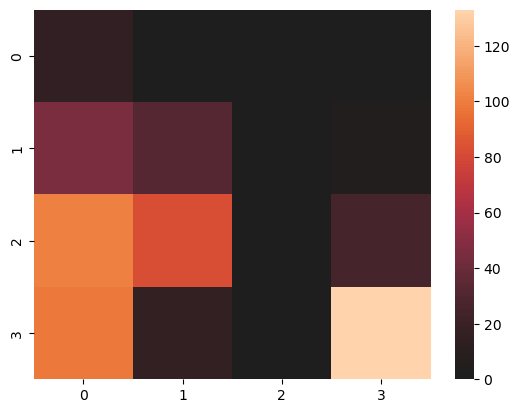

accuracy_score 0.3231597845601436
180
Classification Report:
               precision    recall  f1-score   support

           1       0.06      0.88      0.11        17
           2       0.24      0.38      0.30        84
           3       0.00      0.00      0.00       208
           4       0.81      0.54      0.64       248

    accuracy                           0.32       557
   macro avg       0.28      0.45      0.26       557
weighted avg       0.40      0.32      0.33       557



In [37]:
# naive bayes
#Training the model
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
# for k_fold cross validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV


## ****************************************************

# grid seach
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# # Load the Iris dataset


# # Define the Gaussian Naive Bayes classifier
# nb = GaussianNB()

# # Define the grid of hyperparameters to search
# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
# }

# # Perform grid search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5)
# grid_search.fit(x_train_data_scaler, y_train_data)

# # Print the best hyperparameters found
# print("Best hyperparameters for naibebayes ", grid_search.best_params_)


# ************************************************************
# create a Gaussian Classifier
classifer_GaussianNB = GaussianNB(var_smoothing= 1e-09)
# *********************

# k_fold cross validaation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores_clf1 = cross_val_score(classifer_GaussianNB, x_train_data_scaler, y_train_data, cv=kfold, scoring='accuracy')
print(scores_clf1)
print("Mean for k_fold cross validation for GaussianNB_model", np.mean(scores_clf1))

# ****************
# train the model using the training sets
classifer_GaussianNB.fit(x_train_data_scaler, y_train_data)

# predict the response for test dataset
y_pred = classifer_GaussianNB.predict(x_test_data_scaler)


# *****************************************************
#Calculating Confusion Matrix
CM = confusion_matrix(y_test_data, y_pred)
#print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
print('accuracy_score',accuracy_score(y_test_data, y_pred)) # fraction of all Trues over everything
print(accuracy_score(y_test_data, y_pred, normalize=False)) #number of all Trues
print("Classification Report:\n", classification_report(y_test_data, y_pred))


[0.98461538 0.97692308 0.99230769 0.97692308 0.99230769 1.
 0.97692308 1.         0.99224806 1.        ]
Mean for k_fold cross validation for randomForestModel 0.9892248062015504
RandomForestClassifierModelaccuracy_score are :  0.9946140035906643


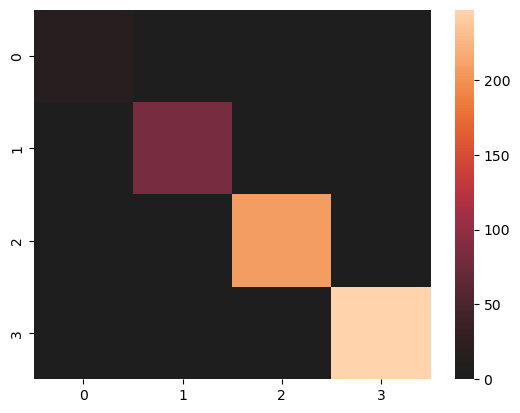

0.9946140035906643
554
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.99      0.99      0.99        84
           3       0.99      1.00      1.00       208
           4       1.00      1.00      1.00       248

    accuracy                           0.99       557
   macro avg       0.99      0.98      0.99       557
weighted avg       0.99      0.99      0.99       557



In [34]:
#Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#----------------------------------------------------
# # grid seach for random forest
# # from sklearn.model_selection import GridSearchCV


# # Define the Random Forest classifier
# RandomForest = RandomForestClassifier()

# # Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Perform grid search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=RandomForest, param_grid=param_grid, cv=5)
# grid_search.fit(x_train_data_scaler, y_train_data)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # **************************



RandomForestClassifierModel = RandomForestClassifier(n_estimators=50,max_features='sqrt',max_depth=None,min_samples_split= 5,min_samples_leaf= 1) #criterion can be also : entropy 

# ****************

# k_fold cross validaation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores_clf2 = cross_val_score(RandomForestClassifierModel, x_train_data_scaler, y_train_data, cv=kfold, scoring='accuracy')
print(scores_clf2)
print("Mean for k_fold cross validation for randomForestModel", np.mean(scores_clf2))

# ****************
RandomForestClassifierModel.fit(x_train_data_scaler, y_train_data)
y_pred = RandomForestClassifierModel.predict(x_test_data_scaler)
print('RandomForestClassifierModelaccuracy_score are : ' , accuracy_score(y_test_data, y_pred, normalize=True))

# ******''
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

#Calculating Confusion Matrix
CM = confusion_matrix(y_test_data, y_pred)
#print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
print(accuracy_score(y_test_data, y_pred)) # fraction of all Trues over everything
print(accuracy_score(y_test_data, y_pred, normalize=False)) #number of all Trues
print("Classification Report:\n", classification_report(y_test_data, y_pred))


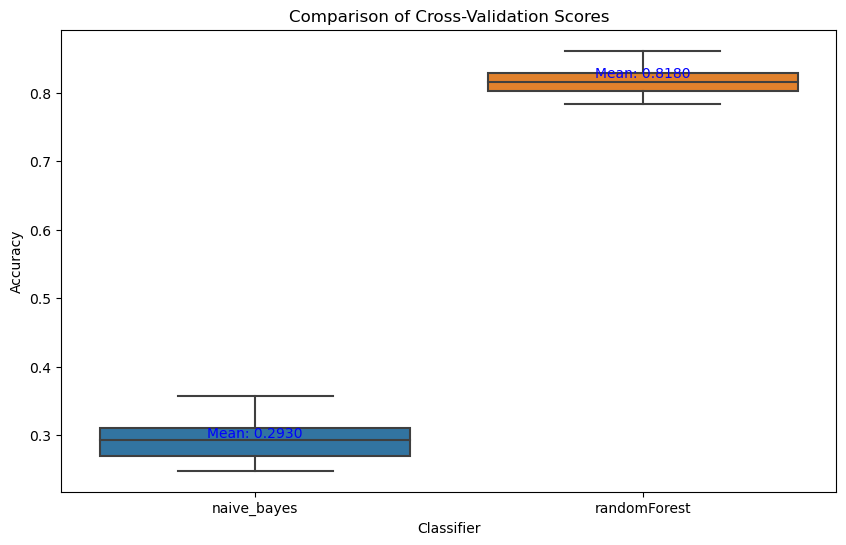

In [28]:
import seaborn as sns
import pandas as pd

# Preparing data in DataFrame format for Seaborn
df1 = pd.DataFrame({'Score': scores_clf1, 'Classifier': 'naive_bayes'})
df2 = pd.DataFrame({'Score': scores_clf2, 'Classifier': 'randomForest'})
df = pd.concat([df1, df2])

# Visualization using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classifier', y='Score', data=df)
mean_scores = [np.mean(scores_clf1), np.mean(scores_clf2)]
# Adding title and y-label
plt.title('Comparison of Cross-Validation Scores')
plt.ylabel('Accuracy')

# Display mean scores
for i, mean in enumerate(mean_scores):
    plt.text(i, mean, f'Mean: {mean:.4f}', ha='center', va='bottom', color='blue')

plt.show()


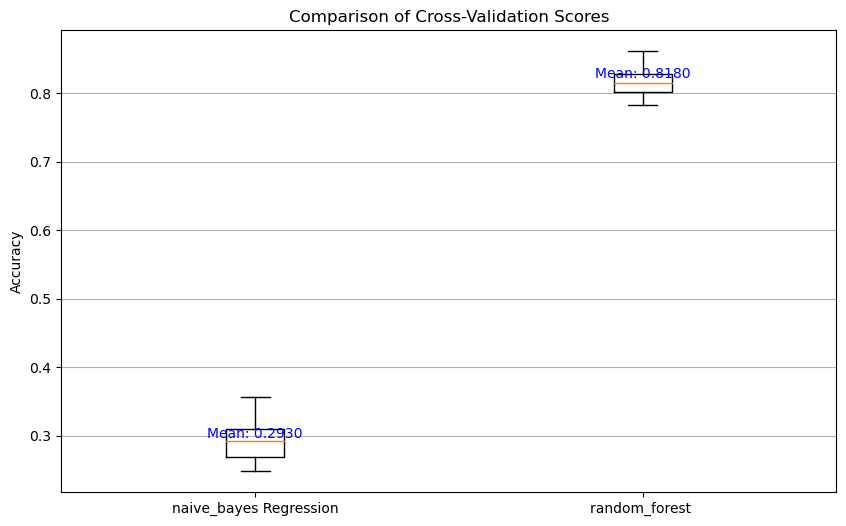

In [29]:
# Visualization
labels = ['naive_bayes Regression', 'random_forest ']
data = [scores_clf1, scores_clf2]

plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Comparison of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 3), labels)
plt.grid(axis='y')

# Calculate and display mean scores
mean_scores = [np.mean(scores_clf1), np.mean(scores_clf2)]
for i, mean in enumerate(mean_scores, 1):
    plt.text(i, mean, f'Mean: {mean:.4f}', ha='center', va='bottom', color='blue')

plt.show()
